# Introduction
___

## **Luthfi Nadyan Putra**

Project ini bertujuan untuk membangun model deep learning menggunakan CNN (*Convolutional Neural Networks*) untuk project *Computer Vision* klasifikasi gambar dengan menggunakan dataset pemisahan atau klasifikasi gambar sampah organik dan daur ulang. Dataset yang digunakan dalam project ini adalah dataset *Waste Classification Data* yang berisi data label untuk sampah organik (*organic*) dan daur ulang (*recycleable*). Link dataset akan dilampirkan dibawah bersamaan dengan link deployment untuk hasil prediksi.

___

1. Deployment Dashboard Link: [Hugging Face Computer Vision](https://huggingface.co/spaces/LuthfiNadyan/Deployment_GC7_ComputerVision).

2. Dataset Link: [Waste Classification Dataset](https://www.kaggle.com/datasets/techsash/waste-classification-data/data).

3. File Dataset dan Model: [Model dan Dataset GC7](https://drive.google.com/drive/folders/1BPeX-Nk7a7A5Nuryx1g3-djBuQqHHItR?usp=sharing).

Disclaimer: Disarankan untuk tidak melakukan run ulang pada notebook ini karena akan mengubah hasil training pada model yang signifikan terhadap hasil analisis (dapat berubah hasilnya).

# A. Latar Belakang

Pengelolaan sampah masih menjadi tantangan besar di berbagai negara. Sebagian besar sampah masih berakhir di tempat pembuangan akhir (TPA), yang menyebabkan berbagai masalah lingkungan seperti pencemaran tanah, air, dan udara, eutrofikasi (pertumbuhan tumbuhan air dan alga berakibat pada penurunan kualitas air bersih), leachate (air lindi beracun), serta ancaman terhadap satwa yang didapat secara tidak sengaja mengonsumsi limbah berbahaya.

Salah satu hambatan utama dalam pengelolaan sampah yang efektif adalah kurangnya sistem pemilahan sampah yang efisien, khususnya dalam membedakan antara sampah organik dan sampah daur ulang. Metode pemilahan secara manual umumnya lambat, mahal, dan rentan terhadap kesalahan manusia (*human error*). Oleh karena itu, untuk menjawab masalah tersebut, project ini mengusulkan pendekatan automasi berbasis *Deep Learning* dengan menggunakan *Convolutional Neural Networks (CNN)*, yang sangat efektif untuk masalah atau tantangan dalam tugas klasifikasi gambar. Dengan memanfaatkan Dataset yang telah tersedia [Waste Classfication Data](https://www.kaggle.com/datasets/techsash/waste-classification-data/data), model akan dilatih untuk mengenali dan mengklasifikasikan jenis sampah berdasarkan gambar sampah organik dan daur ulang. Hasil dari prediksi ini nantinya dapat diintegrasikan ke dalam aplikasi mobile maupun sistem pemilahan sampah otomatis di pusat-pusat daur ulang. Adapun manfaat dari implementasi model ini meliputi:

- Mengurangi volume sampah yang masuk ke TPA.

- Meningkatkan efisiensi dan akurasi proses daur ulang.

- Menurunkan biaya operasional pengelolaan sampah.

- Mendukung praktik ekonomi lingkungan yang berkelanjutan (*Sustainable Development Goals*).

- Mendorong penerapan ekonomi sirkular dan *green economy*.

TARGET USER:

1. Dinas Kebersihan dan Pemerintah Daerah (Pemerintah): untuk mengotomisasi proses pemilihan sampah dan meningkatkan efisiensi pengelolaan sampah.

2. Startup dan Perusahaan Teknologi Lingkungan (Green Tech): yang mengembangkan smart bin, sistem pemilahan sampah yang modern, atau solusi daur ulang cerdas.

3. Perusahaan Komersil:  memastikan pemilahan sampah sesuai regulasi dan meningkatkan tanggung jawab lingkungan perusahaan (CSR).

# B. Import Libraries

In [ ]:
# Import Libraries Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Import libraries for image analysis
import os
from PIL import Image
import cv2
import pathlib
from skimage.feature import local_binary_pattern

# Import Tensor Flow Libraries
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg16 import VGG16

# Import Scikit-Learn untuk Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Import Warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Verify TensorFlow installation and GPU availability
print("TensorFlow Version:", tf.__version__)
print("Is GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.18.0
Is GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# C. Data Loading

Pada bagian ini akan dilakukan data loading untuk dataset yang berasal dari kaggle dataset. Sebagai overview (pengenalan dataset) dataset berisi penjabaran sebagai berikut:

1. Sample: berjumlah 22,500 gambar object sampah untuk organik dan daur ulang. Dataset juga berisi 2 label (class) utama yaitu `O: Organics` dan `R: Recycleable`.

2. Dataset telah dilakukan split untuk data train dan test sejumlah untuk train sebanyak 12,600 sample untuk gambar sampah `Organics (O)` dan 9999 sample untuk gambar sampah `Recycleable (R)`. Untuk dataset test sebanyak 1401 sample gambar sampah `Organics (O)` dan 1112 sample gambar sampah `Recycleable (R)`.

Split juga akan dilakukan untuk dataset validation untuk keperluan model training nantinya dengan mengambil porsi 10 persen dari dataset train.

In [3]:
# Buat json os 
os.environ['KAGGLE_USERNAME'] = 'luthfinadyanputra'
os.environ['KAGGLE_KEY'] = 'ee7fa8c24fcf209c5aed9ca51d596b4b'

In [4]:
# Download kaggle dataset
# ! kaggle datasets download -d techsash/waste-classification-data

Download dataset dari kaggle.

In [5]:
# Unzip dataset yang terdownload ke dalam folder waste_data
# ! unzip -q waste-classification-data.zip 

In [4]:
# Check data sudah terunzip seluruhnya
base_dir = 'DATASET'

for dirpath, dirnames, filenames in os.walk(base_dir):
  print(f"Terdapat {len(dirnames)} directories dan {len(filenames)} gambar dalam '{dirpath}'.")

Terdapat 2 directories dan 0 gambar dalam 'DATASET'.
Terdapat 2 directories dan 0 gambar dalam 'DATASET/TEST'.
Terdapat 0 directories dan 1112 gambar dalam 'DATASET/TEST/R'.
Terdapat 0 directories dan 1401 gambar dalam 'DATASET/TEST/O'.
Terdapat 2 directories dan 0 gambar dalam 'DATASET/TRAIN'.
Terdapat 0 directories dan 9999 gambar dalam 'DATASET/TRAIN/R'.
Terdapat 0 directories dan 12565 gambar dalam 'DATASET/TRAIN/O'.


Setelah dilakukan unzip, dataset telah masuk dan seluruh sample sudah masuk kedalam notebook. Terdapat 12,565 dan 9,999 gambar pada dataset train, dan pada test terdapat 1,112 dan 1,401 gambar pada dataset test. 

In [5]:
# Directory untuk Train dan Test
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')
print(train_dir)

DATASET/TRAIN


In [6]:
# Check subdirectory untuk 'O' dan 'R'
train_or = os.path.join(train_dir, 'O')
train_re = os.path.join(train_dir, 'R')

test_or = os.path.join(test_dir, 'O')
test_re = os.path.join(test_dir, 'R')

print(train_or)
print(train_re)
print('Dataset Train Organic exist:', os.path.exists(train_or))
print('Dataset Train Recycleable exist:', os.path.exists(train_re))
print('Dataset Test Organic exist:', os.path.exists(test_or))
print('Dataset Test Recycleable exist:', os.path.exists(test_re))

DATASET/TRAIN/O
DATASET/TRAIN/R
Dataset Train Organic exist: True
Dataset Train Recycleable exist: True
Dataset Test Organic exist: True
Dataset Test Recycleable exist: True


Dengan melakukan check melalui os path dan check melalui syntax path menghasilkan output 'True' dimana dataset berhasil dilakukan loading dan dapat dilanjutkan untuk ke proses selanjutnya. 

In [7]:
# Pathlib untuk membuat nama class dan jumlah class
data_dir = pathlib.Path(train_dir) # buat training path ke dalam python
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # buat nama class dari sub-directories
class_names = class_names.tolist()
n_class = len(class_names)
print(class_names, n_class)

['O', 'R'] 2


Kode diatas adalah untuk melakukan ekstraksi dari sub-directories (Train path) kedalam python path dari dataset yang telah diunzip. Langkah tersebut bertujuan untuk membuat nama class dari sub-directories tersebut dan mengkonversinya menjadi bentuk list untuk keperluan analisis.

In [8]:
# Mengubah data image menjadi dataframe berdasarkan class (label) nya
dir_dict = {train_dir: "Training", test_dir: "Testing"}

data = []

for type_dir, type_label in dir_dict.items():
    for class_name in class_names:
        target_folder = os.path.join(type_dir, class_name)
        for image_file in os.listdir(target_folder):
            img_path = os.path.join(target_folder, image_file)
            with Image.open(img_path) as img:
                data.append({
                    'Class_Name': class_name,
                    'Type': type_label,
                    'Img_Path': img_path,
                    'Shapes': img.size + (len(img.getbands()),)
                })

df = pd.DataFrame(data)
df.head(10)

Class_Name      Type                     Img_Path         Shapes
0          O  Training  DATASET/TRAIN/O/O_10470.jpg  (225, 225, 3)
1          O  Training   DATASET/TRAIN/O/O_8588.jpg  (224, 224, 3)
2          O  Training   DATASET/TRAIN/O/O_7863.jpg  (264, 191, 3)
3          O  Training  DATASET/TRAIN/O/O_12267.jpg  (300, 168, 3)
4          O  Training   DATASET/TRAIN/O/O_9696.jpg  (276, 183, 3)
5          O  Training  DATASET/TRAIN/O/O_12501.jpg  (210, 240, 3)
6          O  Training  DATASET/TRAIN/O/O_10316.jpg  (259, 194, 3)
7          O  Training   DATASET/TRAIN/O/O_5912.jpg  (258, 195, 3)
8          O  Training  DATASET/TRAIN/O/O_11008.jpg  (275, 183, 3)
9          O  Training  DATASET/TRAIN/O/O_10302.jpg  (276, 183, 3)

Setelahnya, data akan diekstraksi menggunakan loop dan dibuat kedalam bentuk DataFrame. Ditunjukkan bahwa pada kolom shapes adalah tinggi, lebar, dan channel warna dari dataset. Hal tersebut penting yang akan diproses selanjutnya pada tahap Eksplorasi Analisis Data. 

In [9]:
# DataFrame class name 
df['Class_Name'].value_counts(normalize=True)

Class_Name
O    0.556925
R    0.443075
Name: proportion, dtype: float64

Jumlah distribusi kelas menunjukkan bahwa dalam dataset terdapat kelas yang relatif cukup imbalance dengan porsi untuk kelas gambar sampah organik berjumlah 56 persen dan 44 persen untuk kelas sampah daur ulang. 

# D. Exploratory Data Analysis
___

## 1. Distribusi Class pada Dataset

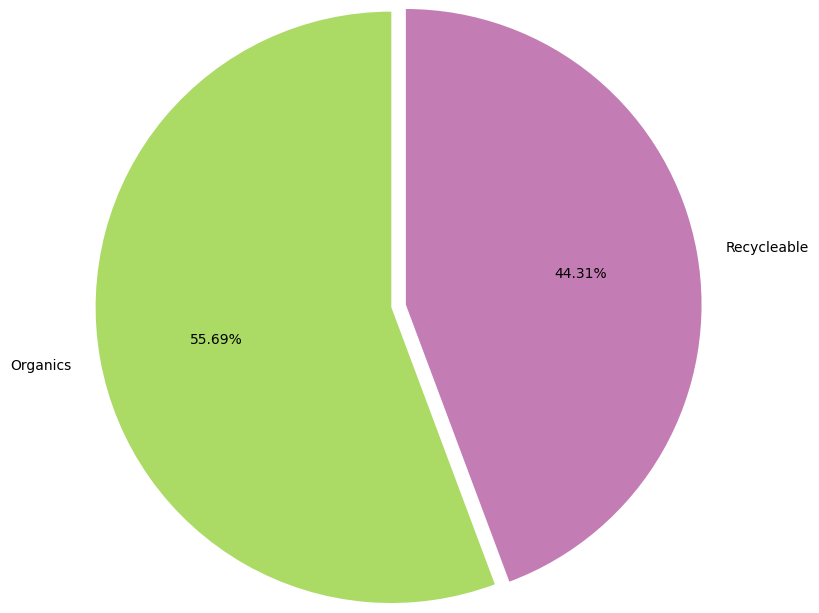

proportion
Class_Name            
O             0.556925
R             0.443075

In [10]:
# Plot gambar distribusi class
colors = ["#abda65","#c37db4"]
class_counts = df['Class_Name'].value_counts()
plt.pie(class_counts,
        startangle=90,
        explode=[0.05]*len(class_counts),
        autopct='%0.2f%%',
        labels=['Organics', 'Recycleable'],
        colors=colors,
        radius=2)
plt.show()

label = pd.DataFrame(df['Class_Name'].value_counts(normalize=True))
label

Intepretasi:

1. Dominasi Sampah Organik.
 
 - Sampah organik merupakan kategori terbanyak dalam dataset ini. Hal ini mencerminkan realita umum dimana di banyak negara atau area geografis, banyak limbah rumah tangga sebagian besar berupa sisa makanan, dan sampah yang mudah terurai lainnya.

2. Distribusi yang imbalance tetapi masih relatif seimbang.

 - Walaupun organik lebih banyak, proporsi antara organik dan daur ulang cukup seimbang (hanya memiliki selisih sekitar 11 persen). Hal tersebut memiliki benefit untuk pelatihan model Deep Learning CNN karena jika terdapat class yang terlalu timpang dapat menyebabkan bias model terhadap satu kelas saja.

3. Potensi Implementasi

 - Dengan jumlah data sampah organik yang lebih banyak, model akan lebih familiar mengklasifikasikan jenis class ini. Namun, hal tersebut penting karena:

    - Menjaga keseimbangan class saat model dilatih.

    - Menggunakan teknik augmentasi untuk menyeimbangkan performa model terhadap kategori "Recycleable". 

## 2. Tampilan Gambar per Kelas

Bagian ini dilakukan untuk mengetahui ciri awal dari visualisasi gambar per kelas pada dataset train.

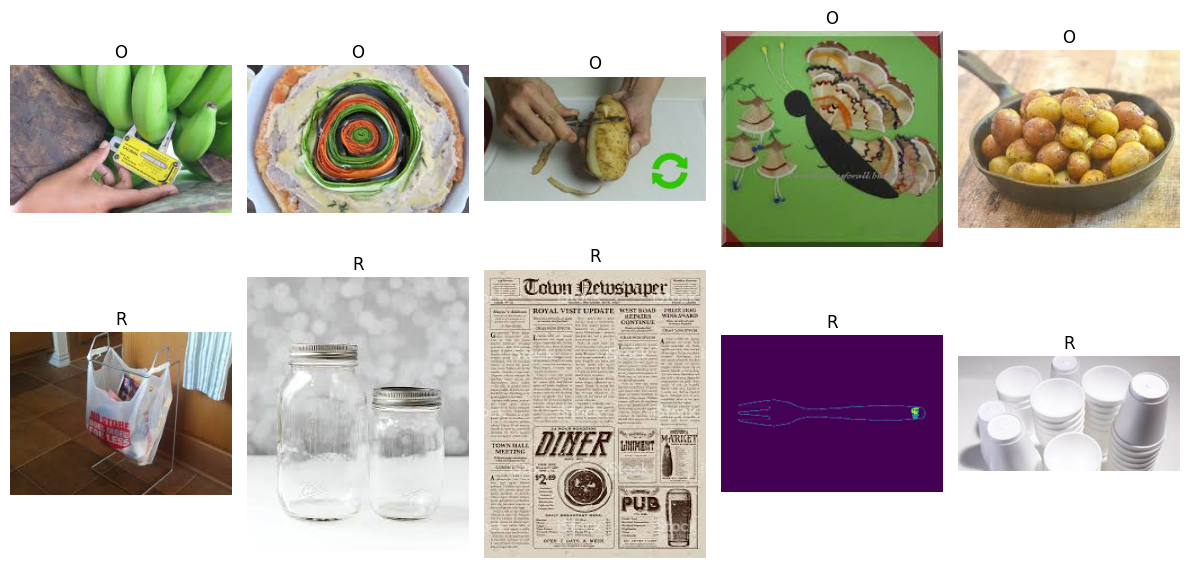

In [11]:
# Tampilan gambar per kelas
df['Image'] = df['Img_Path'].apply(lambda path: np.array(Image.open(path)))
classes = df['Class_Name'].unique()

plt.figure(figsize=(12, 6))

for i, class_label in enumerate(classes):
    class_images = df[df['Class_Name'] == class_label]['Image']
    for j in range(5):
        plt.subplot(2, 5, i*5 + j + 1)
        plt.imshow(class_images.iloc[random.randint(0, len(class_images)-1)])
        plt.axis('off')
        plt.title(class_label)

plt.tight_layout()
plt.show()

Berikut hasil data loading yang berbentuk sampel dari gambar yang telah dilakukan unpacking data diatas. Setelahnya, akan dilakukan Eksplorasi Analisis Data dari sampel-sampel yang telah diambil ini. 

Distribusi Class:

- Terlihat kelas utama memiliki:

    - O (Sampah Organik): Berisi gambar makanan sisa, sayuran, dan buah-buahan

    - R (Sampah Daur Ulang/*Recycleable*): sampah plastik, sampah kertas, dan sampah daur ulang lainnya

Insight Awal:

- Ciri Visual sampah organil (Kelas O):

    - Warna alami: Kuning, Coklat, dan Hijau.

    - Tekstur yang kompleks (tidak beraturan): makanan sisa atau tumbuhan.

    - Tekstur objek yang cenderung terlihat lembek.

- Ciri visual sampah daur ulang (Kelas 1):

    - Dominan memiliki warna yang transparan, bening, atau cerah.

    - Objek keras dan kaku (botol kaca/plastik, kaca, plastik).

    - Beberapa kemasan memiliki brand/label, dapat digunakan dengan model CNN untuk fitur klasifikasi.

- Akan dilakukan augmentasi dan prepprocessing untuk menyelaraskan noise visual.

## 3. Distribusi Ukuran Gambar

Bagian ini dilakukan untuk melihat distribusi ukuran dari setiap gambar sample.

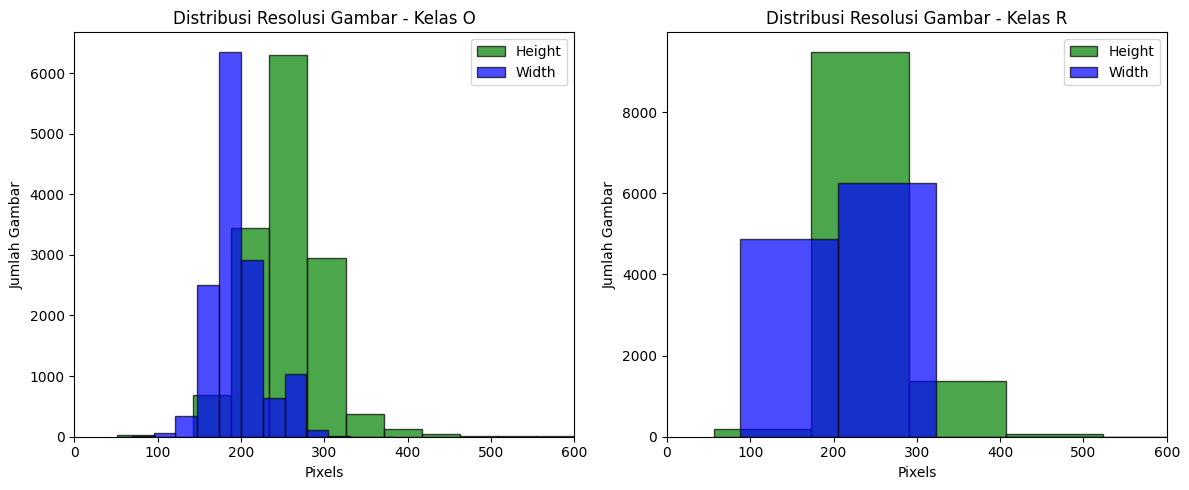

In [12]:
# Tampilan gambar per kelas
df['Height'] = df['Shapes'].apply(lambda x: x[0]) # buat kolom baru untuk ekstraksi nilai tinggi gambar dari bentuk gambar
df['Width'] = df['Shapes'].apply(lambda x: x[1]) # buat kolom baru untuk ekstraksi nilai lebar gambar dari bentuk gambar

# Buat figure untuk tinggi dan lebar tiap class
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # dua kelas dua subplotcolors

for i, class_shape in enumerate(classes):
    class_height = df[df['Class_Name'] == class_shape]['Height']
    class_width = df[df['Class_Name'] == class_shape]['Width']

     # Histogram untuk Height
    ax[i].hist(class_height, bins=12, alpha=0.7, color='green', edgecolor='black', label='Height')
    # Histogram untuk Width
    ax[i].hist(class_width, bins=12, alpha=0.7, color='blue', edgecolor='black', label='Width')
    
    ax[i].set_title(f'Distribusi Resolusi Gambar - Kelas {class_shape}')
    ax[i].set_xlabel('Pixels')
    ax[i].set_ylabel('Jumlah Gambar')
    ax[i].legend()
    ax[i].set_xlim(left=0, right=600)

plt.tight_layout()
plt.show()

Informasi yang didapatkan:

1. Kelas Sampah Organik (Kelas O):

    - Tinggi gambar (Height) paling banyak berada dikisaran sekitar 260–280 pixel.

    - Lebar gambar (Width) paling dominan dikisaran sekitar 180–200 pixel.

    - Distribusi tinggi (hijau) lebih lebar dibandingkan lebar (biru), artinya gambar lebih sering tinggi daripada lebar.
    
    - Distribusinya agak lebih beragam dibandingkan kelas O, artinya gambar dalam kelas Recyclable memiliki ukuran lebih bervariasi, walaupun masih dalam kisaran yang relatif sama.

2. Kelas Sampah Daur Ulang (Kelas R):

    - Tinggi gambar (Height) banyak terdistribusi antara 200–280 piksel.

    - Lebar gambar (Width) cukup dominan di 180–300 piksel.

    - Jumlah gambar pada kelas R lebih banyak dibandingkan kelas O (terlihat dari ketinggian bar histogram).

    - Distribusi tinggi dan lebar cukup rapat dan terkonsentrasi, menandakan gambar organik cenderung memiliki ukuran yang standar dan seragam.

3. Insight Eksplorasi Data:

    - Mayoritas gambar memiliki resolusi yang cukup kecil (mayoritas dibawah 450 pixel), cocok untuk efisiensi ketika melakukan training model CNN (karena tidak dibutuhkan resizing yang ekstrem).

    - Kelas Organic dan Recyclable memiliki ukuran gambar yang relatif mirip, sehingga tidak perlu perlakuan khusus untuk normalisasi ukuran antar kelas.

    - Model deep learning seperti CNN akan lebih mudah melakukan pelatihan karena distribusi gambar relatif terpusat dan konsisten.

## 4. Distribusi RGB 

Pada bagian ini dilakukan distribusi RGB untuk melihat persebaran warna pada dua class berbeda.

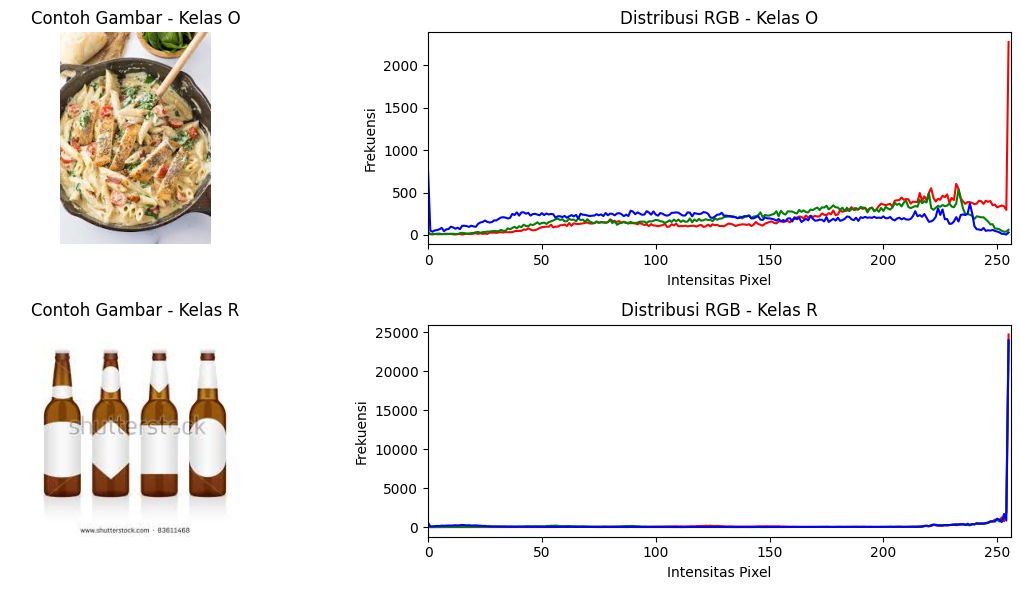

In [15]:
# Buat gambar dengan memilih salah satu gambar kelas
fig, ax = plt.subplots(len(classes), 2, figsize=(12, 6))

for i, class_name in enumerate(classes):
    # Mengambil salah satu sampel gambar 
    sample_pick = df[df['Class_Name'] == class_name]['Img_Path'].sample(2).values[0]

    # Ubah ke RGB
    img_pick = cv2.imread(sample_pick)
    img_rgb = cv2.cvtColor(img_pick, cv2.COLOR_BGR2RGB)

    # Load dan tampilkan gambar
    ax[i, 0].imshow(img_rgb)
    ax[i, 0].axis('off')
    ax[i, 0].set_title(f'Contoh Gambar - Kelas {class_name}')

    # Hitung distribusi RGB
    color_label = ('red', 'green', 'blue')
    for j, color in enumerate(color_label):
        hist = cv2.calcHist([img_rgb], [j], None, [256], [0, 256])
        ax[i, 1].plot(hist, color=color.lower(), label=color)
    
    ax[i, 1].set_xlim([0, 256])
    ax[i, 1].set_title(f'Distribusi RGB - Kelas {class_name}')
    ax[i, 1].set_xlabel('Intensitas Pixel')
    ax[i, 1].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Informasi hasil analisis:

Dari gambar diatas terlihat intensitas pixel dari distribusi RGB dari kedua kelas sangatlah berbeda. Berikut analisis RGB secara mendetil yang dijabarkan sebagai:

1. Distribusi RGB Gambar kelas sampah organik:

    - Seluruh warna (Red, Green, Blue) memiliki intensitas yang beragam dan tinggi pada seluruh rentangan.

    - Distribusi cukup bervariasi dan menyebar, mengindikasikan keragaman warna pada sampel organik.

2. Distribusi RGB Gambar kelas sampah daur ulang:

    - Berbeda dengan gambar sampah organik, pada gambar sampah daur ulang intensitas warnanya cukup stabil dan tersentral. Terdapat intensitas yang cukuopbergelombang pada rentangan sekitar 230 pixel dan terpusat di 250 (tingkat peak).

    - Distribusinya lebih sempit dan terpusat, menandakan gambar recyclable lebih seragam secara visual dan pencahayaannya cenderung netral.

Insight:

- Gambar Organic dapat dikatakan lebih kompleks dalam distribusi warna karena bentuk dan pencahayaan alami dari bahan organik.

- Gambar Recyclable cenderung lebih bersih dan teratur secara pencahayaan dan latar belakang, cocok untuk klasifikasi berbasis RGB karena perbedaan warna lebih tajam.

- Pola RGB ini bisa menjadi fitur penting untuk CNN atau image classifier dalam membedakan antara sampah Organic dan Recyclable.

## 5. Tingkat Tekstur Gambar antara 2 Kelas Berbeda

Pada bagian ini akan ditunjukkan analisis intensitas tekstur dan intensitas pixel pada gambar menggunakan Local Binary Pattern (LBP). Penggunaan LBP bertujuan untuk mengidentifikasi perbedaan tekstur antara gambar sampah organik (O) dan dapat didaur ulang (R) dengan cara yang efisien dan intepretatif.

Alasan penggunaan LBP cocok untuk dataset ini:

1. Karakteristik Tekstur yang Kontras:

    - Sampah organik seperti sisa makanan, daun, atau kulit buah biasanya memiliki tekstur tidak teratur, kasar, dan kompleks.

    - Sampah recyclable seperti botol plastik atau kaca cenderung halus, datar, dan memiliki pola berulang.

    - LBP dapat menangkap perbedaan pola lokal dengan menghubungkan hubungan antar pixel.

2. Ketahanan terhadap Pencahayaan:

    - LBP tetap stabil terhadap perubahan pencahayaan, yang umum terjadi dalam pengambilan gambar dataset sampah ini.

Oleh karena itu, pada bagian ini digunakan Local Binary Pattern (LBP)

- Additional References: [4 Advanced Methods for Texture Classification in Computer Vision](https://medium.com/imagescv/4-advanced-methods-for-texture-classification-in-computer-vision-with-python-code-examples-69f6caecb0d3).

### A. Menggunakan analisis tekstur gambar melalui LBP (Local Binary Pattern)

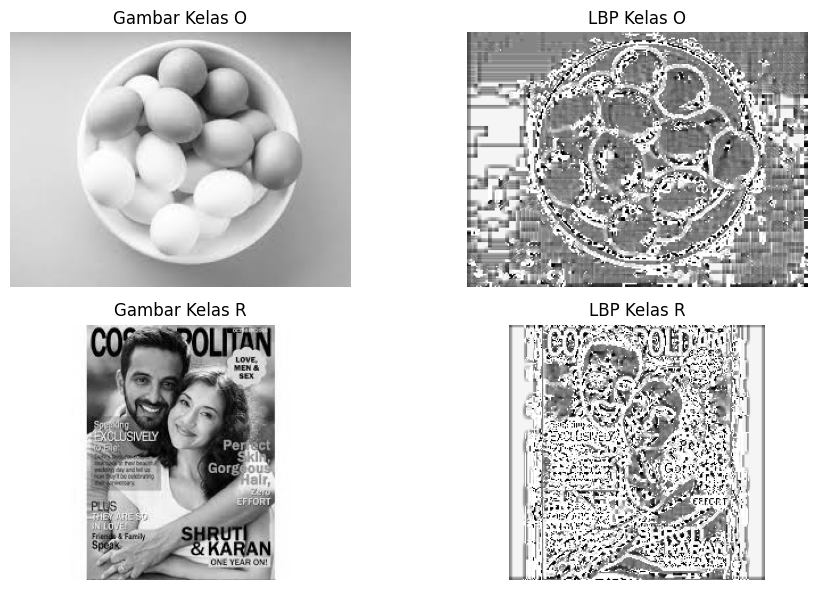

In [16]:
# Parameters
radius = 3
n_points = 8 * radius

# Set figure untuk 2 rows dan 2 kolom (gambar, statistik)
fig, ax = plt.subplots(len(classes), 2, figsize=(10, 6))

for i, class_name in enumerate(classes):
    # Ambil path gambar acak dari kelas
    sample_pick = df[df['Class_Name'] == class_name]['Img_Path'].sample(1).values[0]

    # Load gambar dan ubah ke grayscale
    img_pick = cv2.imread(sample_pick)
    img_gray = cv2.cvtColor(img_pick, cv2.COLOR_BGR2GRAY)

    # Hitung LBP
    lbp = local_binary_pattern(img_gray, n_points, radius, method='uniform')

    # Tampilkan gambar asli dan LBP
    ax[i, 0].imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
    ax[i, 0].set_title(f'Gambar Kelas {class_name}')
    ax[i, 0].axis('off')

    ax[i, 1].imshow(lbp, cmap='gray')
    ax[i, 1].set_title(f'LBP Kelas {class_name}')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()

Intepretasi hasil LBP:

1. Gambar kelas sampah organik:

  - Hasil LBP:

    - Pola tersebar tidak merata, banyak tekstur lokal kecil yang membentuk kontur acak dan berulang.

    - Ini mencerminkan tekstur kompleks yang khas pada sampah organik: lembek, berlapis, serta bentuk yang tidak simetris.

    - LBP berhasil menangkap keragaman objek dan kekasaran pada permukaan objek sampah organik.

2. Gambar kelas sampah daur ulang:

  - Hasil LBP:

    - Pola yang dihasilkan lebih terstruktur dan konsisten.

    - Banyak bagian datar dan halus yang terlihat lebih gelap atau seragam dalam hasil LBP (lebih sedikit pada tepi object).

    - Garis-garis dominan terlihat membentuk struktur simetris pada objek sampah daur ulang.

    - LBP pada kelas sampah daur ulang menunjukkan tekstur yang lebih teratur dan halus, cocok dengan bentuk fisik benda-benda seperti botol, kaca, dan plastik.

Kesimpulan:

- LBP efektif menunjukkan bahwa organik dan recyclable memiliki distribusi tekstur yang berbeda secara signifikan.

- Gambar organik cenderung lebih kaya fitur tekstural, sedangkan recyclable lebih minimalis dan terstruktur.

## 6. Tingkat Saturasi Gambar untuk Kedua Kelas

Pada bagian ini akan dilakukan analisis saturasi pada kelas-kelas diatas dengan menggunakan rata-rata tingkat saturasi gambar kedua kelas, nilai tertinggi kedua kelas, dan nilai terendah kedua kelas.

In [17]:
# Buat list kosong untuk hasil statistik nilai saturasi
saturasi_list = []

# Looping hasil saturasi
for path in df['Img_Path']:
    img_sat = cv2.imread(path)
    img_sat = cv2.cvtColor(img_sat, cv2.COLOR_BGR2HSV)
    s_channel = img_sat[:,:,1]

    mean_sat = np.mean(s_channel)
    max_sat = np.max(s_channel)
    min_sat = np.min(s_channel)
    
    label = df[df['Img_Path'] == path]['Class_Name'].values[0]
    
    saturasi_list.append({
        'Class': label,
        'Mean_Saturation': mean_sat,
        'Max_Saturation': max_sat,
        'Min_Saturation': min_sat
    })

saturation_df = pd.DataFrame(saturasi_list)
saturation_df.head()


Class  Mean_Saturation  Max_Saturation  Min_Saturation
0     O        31.956859             255               0
1     O       165.769830             255              54
2     O       117.116155             255               0
3     O       114.069325             255               2
4     O       216.388018             255               0

In [18]:
# Group by Class
summary_stats = saturation_df.groupby('Class').agg({'Mean_Saturation': ['mean', 'std']}).reset_index()
print(summary_stats)

  Class Mean_Saturation           
                   mean        std
0     O      101.166118  48.004648
1     R       48.182672  44.172799


Terlihat saturasi yang sangat kontras antar kedua kelas dengan tingkat rata-rata saturasinya dengan tingkat persebaran yang tidak terlalu signifikan. Selanjutnya, akan dibuat figure untuk melakukan analisis lebih lanjut.

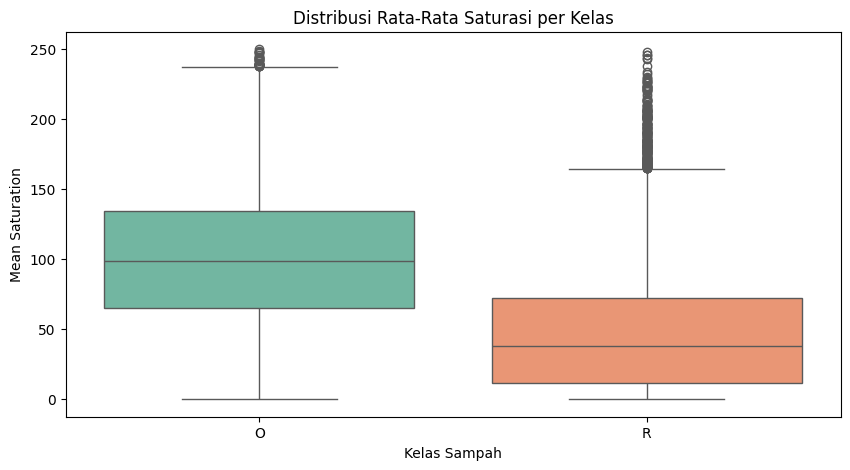

In [19]:
# Buat gambar untuk analisis saturasi
plt.figure(figsize=(10, 5))
sns.boxplot(data=saturation_df, x='Class', y='Mean_Saturation', palette='Set2')
plt.title('Distribusi Rata-Rata Saturasi per Kelas')
plt.ylabel('Mean Saturation')
plt.xlabel('Kelas Sampah')
plt.show()

Intepretasi:

1. Saturasi kelas sampah organik (kelas O) menunjukkan distribusi rata-rata saturasi yang tersentral dengan tingkat persebaran antar nilainya yang stabil.

2. Saturasi kelas sampah daur ulang (kelas 1) menunjukkan distribusi rata-rata saturasi yang memiliki nilai ekstrem yang lebih tinggi. Hasil ini menunjukkan nilai saturasi pada kelas sampah daur ulang memiliki nilai yang kompleks dan tidak stabil (banyak nilai ekstrem). Untuk kelas ini relatif memiliki nilai saturasi yang rendah (dengan beberapa outlier saturasi tinggi yang cukup tinggi).

Insight:

- Hal ini sangat berpengaruh dengan data augmentasi yang akan dilakukan nanti untuk model best tuning (CNN) hal ini mengindikasi setiap perubahan saturasi warna pada gambar yang bertujuan membantu model mengenali gambar dan dapat belajar untuk membedakan dua kelas.

# E. Modeling: Base Model (Using CNN)
___

## 1. Feature Engineering

### a. Model Konfigurasi 

In [20]:
# Setting konfigurasi gambar 
img_height = 224
img_width = 224
batch_size = 32

Umumnya pada model cnn digunakan setting konfigurasi 224 x 224 untuk melakukan training yang optimal, sehingga dalam project ini digunakan nilai tersebut.

### b. Data Augmentasi dan Pre-processing

Dalam tahap ini akan dilakukan data augmentasi yang bertujuan untuk menyiasati agar training yang dihasilkan optimal. Berikut beberapa poin penting kenapa dilakukan data augmentasi.

Alasan melakukan augmentasi data pada dataset ini:

1. Dataset Imbalance (Ketidakseimbangan Kelas)

    - Jumlah gambar sampah organik (Kelas O) dan sampah daur ulang (Kelas R) tidak seimbang, model cenderung bias terhadap kelas mayoritas (Kelas O).

    - Melakukan augmentasi dapat meningkatkan jumlah data pada kelas minoritas tanpa mengumpulkan data baru (misalnya dengan melakukan rotasi, flip, zoom pada gambar).

2. Model CNN rentan Overfitting dengan data terbatas

    - Model CNN memiliki banyak parameter, sehingga jika dataset terlalu kecil atau tidak beragam, model memiliki posibilitas hanya menghafal gambar (overfitting).

    - Augmentasi menciptakan variasi baru dari gambar asli untuk membantu model belajar pola umum, bukan menghafal detail.

3. Variasi Visual yang Tinggi pada Sampah

    - Sampah dalam dunia nyata memiliki berbagai bentuk, warna, orientasi, dan kondisi pencahayaan.

    - Augmentasi seperti *rotation*, *cropping*, *noise addition* membantu simulasi kondisi dunia nyata, memperkuat generalisasi model.

4. Penyesuaian terhadap kondisi data baru

    - Augmentasi membantu mempersiapkan model untuk menghadapi gambar tidak ideal, seperti miring, blur, atau sebagian tertutup.

Oleh karena alasan diatas, improvisasi akan dilakukan melalui augmentasi data berdasarkan hasil Eksplorasi Analisis Data (EDA) yang telah dibahas sebelumnya.

Found 18052 images belonging to 2 classes.


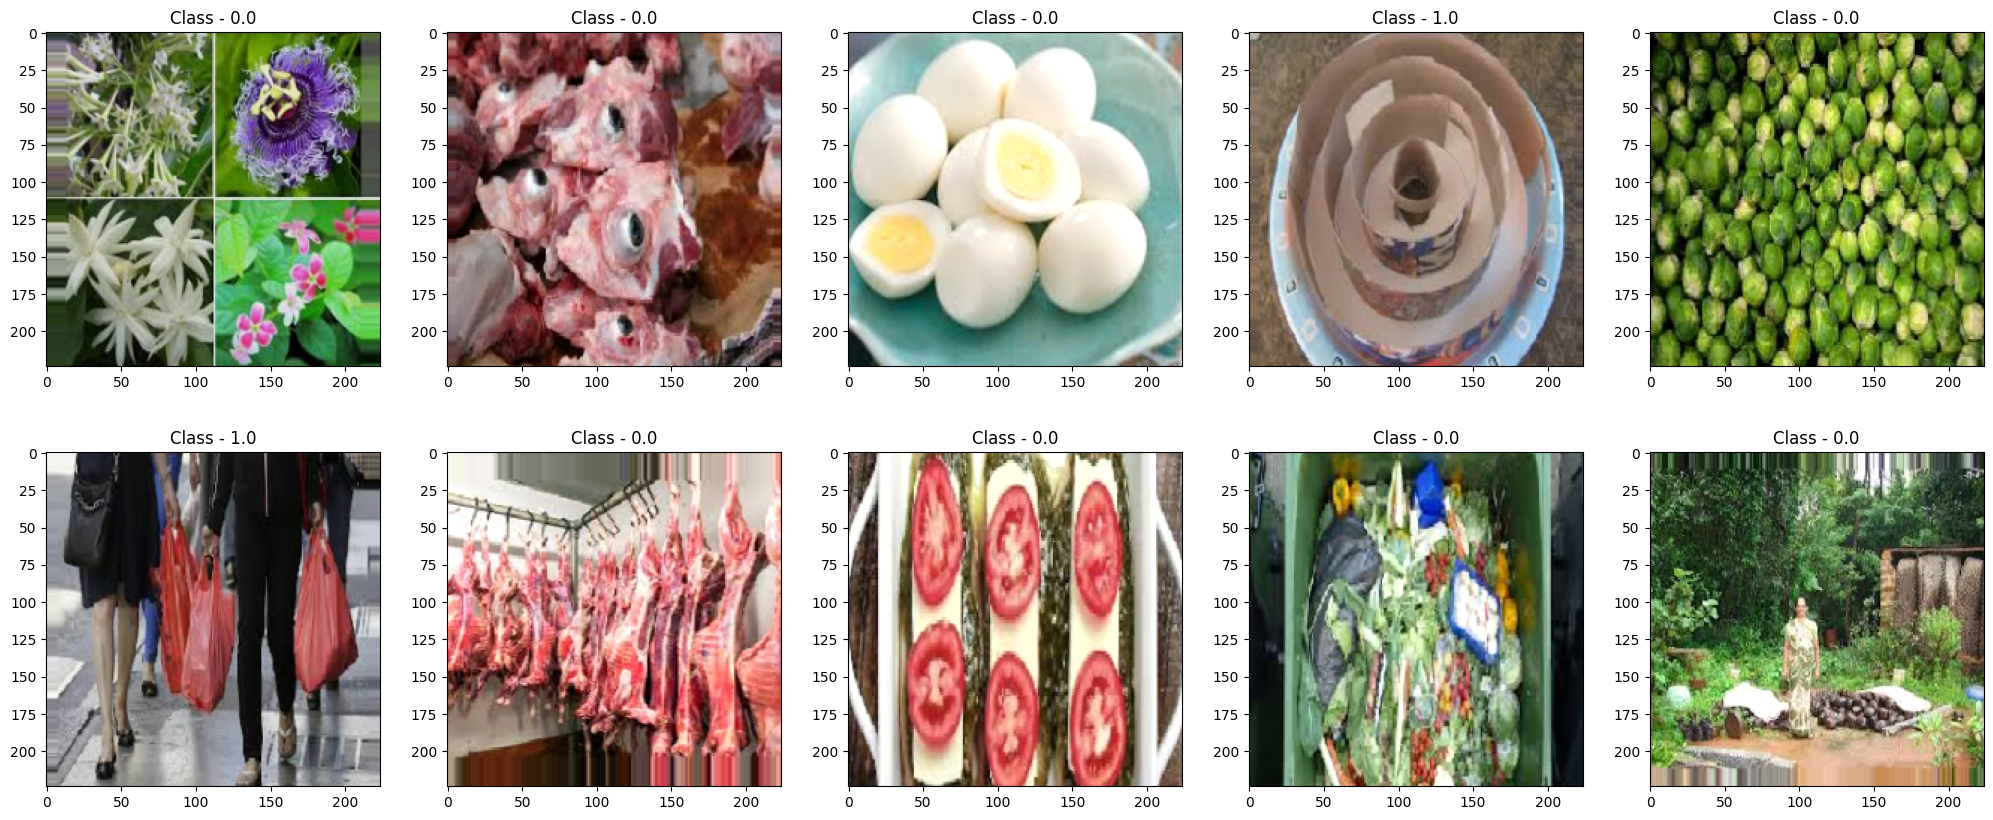

In [21]:
# Preprocessing dengan parameter augmentasi
train_datagenaug = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.9, 1.1],      
                                                                zoom_range=0.2,    
                                                                horizontal_flip=True,          
                                                                rescale=1./255,
                                                                validation_split=0.2)

train_setaug = train_datagenaug.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              subset='training',
                                              color_mode='rgb',
                                              batch_size=batch_size,                                            
                                              seed=42)

# Show images of train-set
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25,10))
n = 0

for i in range(2):
  for j in range(5):
    img = train_setaug[0][0][n]
    ax[i][j].imshow(img)
    ax[i][j].set_title('Class - ' + str(train_setaug[0][1][n]))
    n += 1

Berikut penjelasan hasil augmentasi:

1. `brightness_range = [0.9, 1.1]`

    - Brighness_range sebesar 0.9 sampai 1.1 adalah nilai yang soft untuk tetap merepresentasikan hasil gambar natural dan hanya meningkatkan tingkat pencahayaannya hanya sedikit. Hal ini bertujuan untuk mensimulasi kondisi pencahayaan dunia nyata.

    - Dalam klasifikasi gambar (terutama dataset dunia nyata), pencahayaan gambar bisa berbeda-beda tergantung waktu, kamera, bayangan, dll.

    - Membuat model lebih tahan terhadap noise pencahayaan, dan tidak hanya bergantung pada brightness dari gambar yang ada saja.

    - Bertujuan mengurangi overfitting, variasi brightness kecil ini memaksa model untuk belajar fitur penting, bukan hanya pencahayaan atau generalisasi yang baik.

2. `zoom_range = 0.2`

    - Memiliki fungsi untuk memperbesar dan memperkecil objek dalam gambar.

    - Memiliki manfaat untuk memberikan model situasi dimana objek terlihat lebih dekat atau jauh dari kamera.

    - Membantu model belajar untuk mengeneralisasi skala objek.

    - Resolusi gambar yang sangat bervariasi (lonjakan dari 100 pixel ke 400 pixel ditandai dengan variasi nilai yang tersebar - pada EDA)

    - Teknik augmentasi zoom ini memperluas kemampuan model dalam menangani perbedaan ukuran input secara alami.

3. `horizontal_flip = True`

    - Membalik gambar secara horizontal.

    - Berguna untuk simetri pada objek gambar sampah seperti daun, makanan, piring, dan botol.

    - Membantu model untuk tidak overfit terhadap arah kanan atau kiri.

    - Jika dilihat dari hasil EDA objek banyak yang simetris penggunaan flip horizontal dapat digunakan.

4. `rescale = 1./255`

    - Normalisasi pixel ke rentang [0, 1]

    - Membantu konvergensi model dan mengurangi skala pixel RGB.

    - Hal ini adalah best practice dari penggunaan model CNN yang wajib dilakukan.

### c. Preprocessing dengan hasil augmentasi

In [22]:
# Preprocessing dengan parameter augmentasi
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.9, 1.1],      
                                                                zoom_range=0.2,    
                                                                horizontal_flip=True,          
                                                                rescale=1./255,
                                                                validation_split=0.2)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='binary',
                                              subset='training',
                                              batch_size=batch_size,                                            
                                              shuffle=True,
                                              seed=42)


val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                            validation_split = 0.2)

val_set = val_datagen.flow_from_directory(train_dir,
                                        target_size=(img_height,img_width),
                                        class_mode='binary',
                                        subset='validation',
                                        batch_size=batch_size,
                                        shuffle=True,
                                        seed=42)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=42)

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


Berikut parameter yang digunakan untuk base model dalam project ini. Pembagian terhadap dataset validation adalah sebesar 15 persen dari dataset training, yang berarti dari keseluruhan dataset didapatkan 85 persen training dataset yang dibagi lagi menjadi 60 persen training dataset dan 20 persen validation dataset. Penggunaan split sebesar 20 persen dimaksudkan agar data validasi tidak terlalu sedikit porsinya, sehingga hasil yang diinginkan menghasilkan hasil yang optimal ketika model belajar.

| Dataset | Shuffle | Alasan Penggunaan |
| --- | --- | --- |
| Train | True | Mengambil gambar secara acak yang akan masuk ke batch training ketika pelatihan untuk menghindari learning bias |
| Validation | True | Bertujuan untuk evaluasi yang konsisten dengan data train sebagai try-out dilakukan test sebelum prediksi data yang belum dilihat |
| Test | False | Untuk mengkomparasi prediksi dengan label yang sesuai dalam urutan yang sama (konsisten) |

## 2. Model Definition: Base Model

In [28]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [29]:
# Buat arsitektur CNN
model = Sequential()

model.add(Conv2D(32, (3,3), padding='valid', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


# GlobalAveragePooling
model.add(GlobalAveragePooling2D())

# Fully connected layer with drop out
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.5))

# Output Layer untuk kelas binary 
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', Recall()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 111, 111, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 111, 111, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 55, 55, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25, 25, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 489,153 (1.87 MB)

 Trainable params: 488,193 (1.86 MB)

 Non-trainable params: 960 (3.75 KB)

Diatas adalah model based CNN dengan menggunakan 4 layer utama (CNN) dan 2 layer tambahan untuk bagian (dense - ANN). Jika hasil belum optimal akan dilakukan improvisasi model dengan berbagai macam metode pembangunan model ataupun menggunakan pre-trained model (transfer learning).

Intepretasi layer CNN dan Dense (ANN) yang digunakan:

1. Conv2D: 

  - Layer konvolusi yang digunakan dengan berukuran 32, 64, 128, 256 filter dengan masing-masing diterapkan kepada 4 layer filter dan masing-masing memiliki filter berukuran 3 X 3.

  - Menggunakan activation 'relu' yang bertujuan untuk membantu menghilangkan efek negatif dan mempercepat konvergensi, serta mengurangi vanishing gradient.

  - Padding yang digunakan diawal layer adalah padding 'valid' yang bertujuan untuk ekstraksi output feature map lebih sedikit dari input pada awal layer, untuk layer berikutnya digunakan padding 'same' yang digunakan untuk menjaga dimensi spasial ditengah saat input masuk kedalam layer tersebut (output sama ukurannya seperti input).

  - Input_shape = (224, 224, 3) merupakan input berupa gambar RGB.

2. BatchNormalization:

 - Melakukan normalisasi output dari layer sebelumnya sehingga mempercepat training dan menjaga kestabilan distirbusi aktivasi ntar layer.

 - Memiliki efek mengurangi internal covariate shift untuk training yang lebih cepat dan stabil.

3. MaxPooling2D:

 - Mengambil nilai maksimum dari area matriks 2 X 2

 - Mengurangi dimensi spasial dan parameter seiring mempertahankan fitur penting

 - Layer ini berfungsi untuk memperkecil ukuran data dan dapat juga menghindari overfitting (Downsampling)

4. GlobalAveragePooling2D:

 - Mengubah setiap feature map menjadi 1 nilai rata-rata

 - Mengganti Flatten untuk skala yang lebih ringan dan mengurangi overfitting

 - Mengambil rata-rata global dari setiap channel.

5. Fully connected layers

 - Menggunakan Dense (ANN) dengan 256 unit sebagai layer pertama dan 128 unit sebagai layer kedua.

 - L2 regulizer (Lasso Penalty) yang berfungsi sebagai minimalisasi bobot yang besar atau ekstrem agar regulasasi optimal.

 - Drop out berfungsi untuk menonaktifkan neuron sebesar 50 persen dan menjadi strategi regularisasi model.

6. Output Layer

 - Digunakan sigmoid karena klasifikasi pada project ini adalah biner.

 - Output berupa probabilitas antara 0 dan 1.

7. Model Compile Layers

 - Untuk loss function digunakan 'binary_crosentropy' yang cocok untuk klasifikasi biner.

 - Adam adaptive optimizer yang merupakan kombinasi terbaik dari RMSProp dan Momentum.

 - Metrics yang digunakan adalah untuk optimisasi akurasi klasifikasi dan fokus kemampuan mendeteksi positif (penting karena pada EDA dilakukan eksplorasi yang menunjukkan bahwa class data timpang untuk kelas positif 'minoritas', terdapat juga pada dataset yang memiliki mislabeling yang seharusnya gambar tersebut adalah gambar sampah daur ulang atau recycleable).

In [30]:
# Plot layers
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [32]:
# Set earlystop
earlystopping = EarlyStopping(monitor = 'val_loss', 
                              restore_best_weights = True, 
                              patience = 5,
                              verbose = 1)

Penggunaan earlystop dengan mencari nilai validation loss terkecil per batch epoch yang dilatih.

## 3. Model Training: Base Model

In [33]:
# Train base model
history = model.fit(train_set, epochs=20, validation_data=val_set, callbacks=earlystopping, batch_size=batch_size)

Epoch 1/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 160s 278ms/step - accuracy: 0.7392 - loss: 0.8001 - recall: 0.7102 - val_accuracy: 0.8316 - val_loss: 0.4694 - val_recall: 0.8529
Epoch 2/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 188s 331ms/step - accuracy: 0.8012 - loss: 0.5174 - recall: 0.7818 - val_accuracy: 0.8021 - val_loss: 0.5230 - val_recall: 0.9145
Epoch 3/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 182s 322ms/step - accuracy: 0.8279 - loss: 0.4518 - recall: 0.7966 - val_accuracy: 0.6851 - val_loss: 0.6445 - val_recall: 0.8869
Epoch 4/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 188s 332ms/step - accuracy: 0.8344 - loss: 0.4329 - recall: 0.8063 - val_accuracy: 0.8278 - val_loss: 0.4497 - val_recall: 0.9225
Epoch 5/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 188s 333ms/step - accuracy: 0.8384 - loss: 0.4263 - recall: 0.8209 - val_accuracy: 0.8052 - val_loss: 0.4902 - val_recall: 0.6498
Epoch 6/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 190s 336ms/step - accuracy: 0.8375 - loss: 0.4302 - recall: 0.8130 - val_accuracy: 0.8375 - val_loss: 0.4058 -

## 4. Model Evaluation: Base Model

Pada bagian ini akan dilakukan evaluasi model dari hasil training menggunakan visualisasi, classification report, dan confussion matrix.

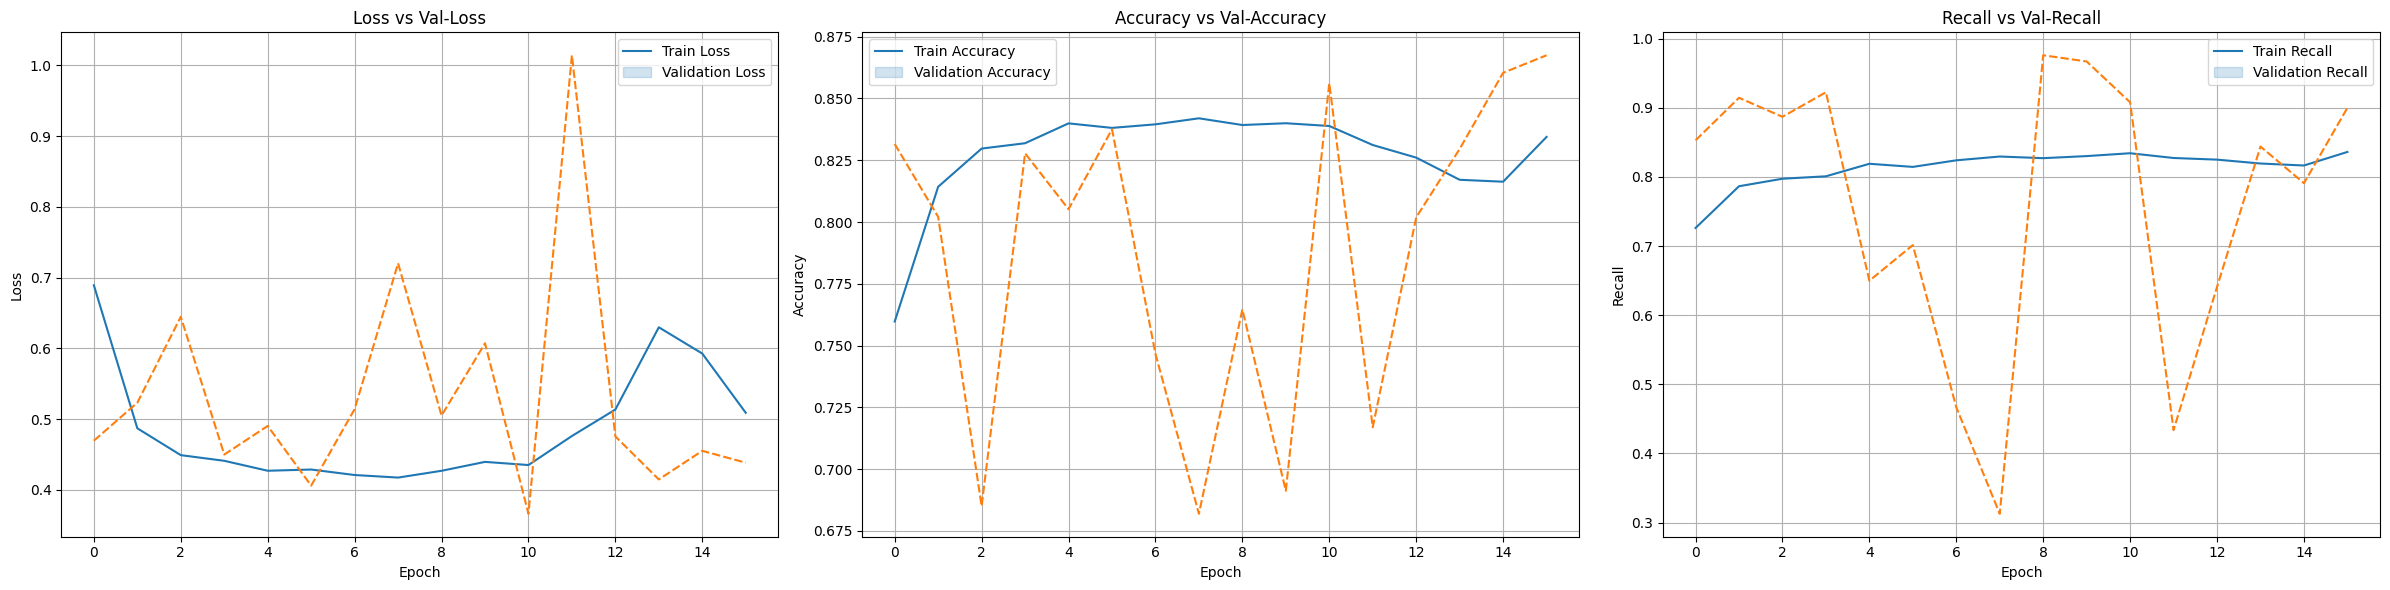

In [34]:
# Plot evaluasi dari training base model
history_base = pd.DataFrame(history.history)

plt.figure(figsize=(24, 6))

# Plot Loss vs Val-Loss
plt.subplot(1, 3, 1)
sns.lineplot(data=history_base[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])

# Plot Accuracy vs Val-Accuracy
plt.subplot(1, 3, 2)
sns.lineplot(data=history_base[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

# Plot Recall vs Val-Recall
plt.subplot(1, 3, 3)
sns.lineplot(data=history_base[['recall', 'val_recall']])
plt.grid()
plt.title('Recall vs Val-Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Train Recall', 'Validation Recall'])

plt.tight_layout()
plt.show()

Intepretasi grafik:

Secara umum ketiga metrics diatas menghasilkan hasil yang overfitting dengan menggunakan model CNN. Untuk seluruh detail penjelasan akan dijelaskan sebagai berikut.

1. Evaluasi Grafik Train Loss vs Val-Loss

  - Train loss menunjukkan penurunan yang konsisten hingga akhir epoch yang berarti model mampu mempelajari pola dari data pelatihan, sedangkan untuk validation loss menunjukkan ketidak konsistenan yang berujung pada overfitting. Terlihat bahwa kedua kurva tersebut hampir konvergen diakhir epoch yang menandakan adanya titik irisan epoch optimal. 

  - Ditunjukkan indikasi overfitting yang dimana nilai validation loss lebih tinggi daripada train loss, hal ini dapat menjadi indikasi kurangnya resource validasi walaupun dari dataset telah diambil 20 persen bagiannya (dataset secara alami sudah terbagi untuk porsi trainnya).

  - Overfitting yang cukup tinggi mengindikasikan bahwa model terlalu fokus belajar terhadap data train, dan kurang stabil pada data validasi. Hal ini dapat pula mengindikasikan bahwa adanya keseimbangan kelas walaupun nilainya tidak terlalu timpang.

2. Evaluasi Grafik Train Accuracy vs Val-Accuracy

  - Train accuracy menunjukkan peningkatan yang bertahap dan konsisten, mencapai nilai sekitar 87 persen hal ini mengindikasikan bahwa hasil train sudah sangat baik dan kovergensinya stabil.

  - Fluktuasi Val-accuracy yang cukup tinggi, dan bahkan dibeberapa epoch melebihi accuracy. Namun, terdapat spike atau lonjakan/penurunan tajam yang tidak wajar, menandakan dalam validasi set model tidak dapat menggeneralisasi dengan baik dan tidak konsisten (terkadang model sangat baik divalidasi, tapi gagal di epoch berikutnya).

  - Dimungkinkan karena memang pada validation test tidak dilakukan augmentasi sehingga hasilnya tidak konsisten, tujuan saya untuk tidak mengaugmentasi adalah untuk mempersiapkan model ketika melakukan prediksi terhadap test set.

3. Evaluasi Grafik Train Recall vs Val-Recall

  - Train recall stabil dan mengikuti trend kurva dari trend akurasi.

  - Val-Recall sangat fluktuatif.

  - Digunakan komparasi recall karena untuk mengukur kemampuan model mengenali kelas positif.

  - Val-Recall yang fluktuatif juga dapat ditandai oleh adanya data imabalance.

Hal ini juga ditandai dengan sampel train yang sangat banyak (≈ 13,000) dengan validation test yang sedikit. Dimungkinkan dan direkomendasikan untuk melakukan epoch dengan nilai yang lebih tinggi lagi untuk melihat nilai konvergensinya lebih baik lagi.

In [ ]:
# Evaluasi pertama validation test
results = model.evaluate(val_set)

# Menampilkan hasil evaluasi
print("Loss:", results[0])
print("Accuracy:", results[1])
print("Recall:", results[2])


141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.8576 - loss: 0.3637 - recall: 0.8965
Loss: 0.36603453755378723
Accuracy: 0.85616135597229
Recall: 0.9079539775848389


Intepretasi Evaluasi Model CNN:

1. Loss yang rendah sebesar `0.3660`:

  - Nilai loss yang rendah menandakan bahwa prediksi model cukup dekat dengan nilai sebenarnya (*ground truth*).

  - Karena menggunakan `binary_crossentropy`, nilai loss < 0.5 umumnya bisa dianggap baik.

  - Memiliki posibilitas model dapat berhasil meminimalkan kesalahan prediksi pada data uji/test secara signifikan.


2. Akurasi yang cukup tinggi sebesar `0.8561`:

  - Model ini dapat dikatakan memiliki posibilitas akurasi performa sangat baik untuk model pengklasifikasian gambar biner.

  - Model memiliki kemampuan generalisasi yang kuat terhadap data yang belum pernah dilihat saat training.

3. Recall yang tinggi sebesar `0.9079`:

  - Dari seluruh kelas positif yang sebenarnya, model berhasil menangkap atau mendeteksi 90.79 persen dari sampel.

  - Hal ini penting karena dataset yang imbalance yang mengharuskan model untuk meminimalisasi false negatif (untuk class mislabeling juga).

  - Hasil recall tinggi ini juga menunjukkan bahwa model tidak terlalu bias terhadap kelas mayoritas, dan cukup handal dalam mengenali kelas target yang lebih sulit.

Note: untuk metrics evaluasi bukan untuk penilaian utama melainkan analisis tambahan hasil training model.


In [43]:
# Get the probability
y_pred_prob_test = model.predict(test_set) # probabilitas tingkat kepercayaan prediksi

# Get this for standarization of the array
y_pred_class_test = (y_pred_prob_test > 0.5).astype(int).flatten() # menggunakan code ini karena hasil output adalah binary (sigmoid) untuk menghasilkan array [0, 1]
y_true_test = test_set.classes

# Display Classification Report
print('\n Test Set:', classification_report(y_true_test, y_pred_class_test, target_names=(list(test_set.class_indices.keys()))))

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step

 Test Set:               precision    recall  f1-score   support

           O       0.89      0.88      0.88      1401
           R       0.85      0.86      0.86      1112

    accuracy                           0.87      2513
   macro avg       0.87      0.87      0.87      2513
weighted avg       0.87      0.87      0.87      2513



Disclaimer: Pada classification report akan dilakukan analisis hanya melalui dataset test. Alasan utamanya adalah karena pada data split pada saat pre-processing untuk train_set digunakan `shuffle = True` yang dimana ketika melakukan penghitungan classification report akan digunakan train_set.classes yang dimana nilai yang berurutan akan dihitung dengan nilai yang dirandomize oleh urutan gambarnya berdasarkan batchnya, dimana ketika urutannya berbeda akan terjadi miscalculation karena labelling yang berbeda urutannya. Berbeda dengan dataset test dimana `shuffle = False` yang dimana urutannya selaras dengan nilai test_set.classesnya sehingga hasilnya akan sesuai.

Intepretasi classification report:

1. Nilai Akurasi sebesar 87 persen

  - Hal ini menandakan sebesar 87 persen dari seluruh gambar sebanyak 2513 sample pada dataset test berhasil diklasifikasikan dengan benar oleh model.

  - Sebagai metrics umum, hal ini menunjukkan bahwa model cukup stabil dan mampu mengenali pola visual antara limbah organik dan daur ulang (recyceable)/

  - Namun, karena pada dataset ini ada ketimpangan dataset yang relatif cukup besar accuracy saja tidak cukup jika kita ingin mengetahui apakah model lebih sering salah pada salah satu kelas (misalnya hanya mengenali organik dengan baik) atau menggunakan Recall juga.

2. Nilai Recall sebesar 86 persen

  - Recall atau sesitivitas model untuk menangkap sebesar 86 persen kasus positif dengan memiliki tingkat kesalahan mislabeling sebesar 14 persen.

  - Tingginya nilai recall menunjukkan model memiliki sensitivitas yang baik, terutama ketika ingin model tidak melakukan mislabeling lebih banyak lagi.

  - Hal ini meberikan dampak untuk meminimalisasi resiko false negatif dimana sampah daur ulang dianggap sebagai sampah organik yang dapat mengurangi nilai ekonomi yang terjadi.

3. Analisis Model

  - Model menunjukkan performa simetris di kedua kelas dan pada kedua metrics utama 

  - Recall dan Accuracy yang tinggi secara bersamaan sangat menjanjikan untuk generalisasi model terhadap perbedaan kedua kelas.

Selanjutnya, akan dilakukan analisis terhadap hasil confusion matrixnya.


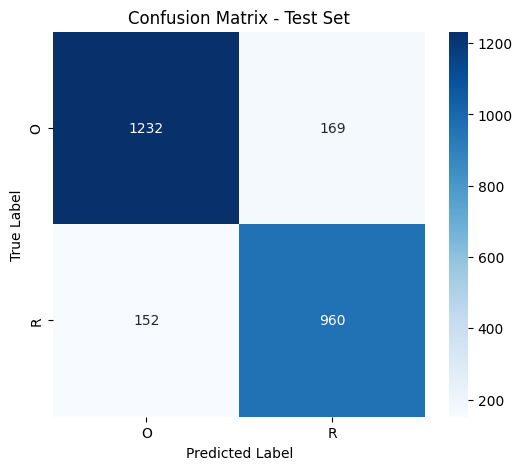

In [80]:
# Confusion Matrix
cm = confusion_matrix(y_true_test, y_pred_class_test)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

Intepretasi hasil confusion matrix:

1. Model bekerja sangat baik untuk kedua kelas, dengan sedikit keunggulan dalam mendeteksi sampah organik (O) dibandingkan recycleable (R) (imbas kelas imbalance yang relatif masih stabil).

2. Dari confussion matrix didapatkan bahwa model mampu mempertahankan performa baik di data test tanpa kejatuhan drastis, yang berarti pipeline pelatihan cukup efektif.

3. Kelemahannya adalah model Recall kelas Recyclable sedikit lebih rendah dari Organics, artinya model sedikit kesulitan membedakan antara keduanya.

Model klasifikasi baseline ini sudah menunjukkan kinerja yang sangat baik dengan akurasi total sebesar 87.22%, serta keseimbangan yang solid antara precision dan recall di kedua kelas. Meskipun terdapat error dalam membedakan antara organik dan daur ulang, model sudah berada pada tingkat yang sangat layak untuk aplikasi nyata di bidang waste image classification, dan hanya membutuhkan sedikit refinement tambahan untuk mendekati performa optimal ataupun menggunakan arsitektur transfer learning untuk melakukan improvement model lebih baik lagi yang akan dilakukan pada bagian selanjutnya.

# F. Modeling: Model Improvement
___

## 1. Model Definition: VGG16 Transfer Learning

VGG16 adalah salah satu pre-trained model atau arsitektur yang telah dilakukan training sebelumnya dari dataset berbeda yang memiliki tingkat keakuratan yang tinggi. Terdapat beberapa studi empiris yang menyatakan bahwa penggunaan arsitektur ini sangat baik untuk melakukan klasifikasi gambar dengan menunjukkan output yang baik. Dalam konteks klasifikasi gambar sampah atau manajemen pemilahan sampah, terdapat penilitian dan pengujian empiris yang dilakukan (di Indonesia) dengan mengaplikasikan arsitektur ini menjadi based model dalam aplikasi mobile phone. Penelitian dari [Wulandari et al, 2022](https://download.garuda.kemdikbud.go.id/article.php?article=3443423&val=29976&title=DjunkGo%20A%20Mobile%20Application%20for%20Trash%20Classification%20with%20VGG16%20Algorithm) menyatakan bahwa arsitektur VGG16 ini memiliki output akurasi yang sangat tinggi untuk klasifikasi sampah. Penelitian tersebut menyatakan dan menyajikan kesimpulan bahwa arsitektur VGG16 dapat memberikan akurasi yang memberikan tingkat akurasi sebesar 90 persen dalam mengidentifikasi klasifikasi sampah. Selain itu, penelitian lain dari [Andrean et al](https://eprints.unram.ac.id/48170/2/Paper_Putu%20Yudhis%20Andrean%20%28F1D021130%29.pdf) yang dimana penelitian tersebut menghasilkan nilai akurasi, precision, recall, F1-Score sebesar 97 persen yang stabil antara valiasi data pelatihan dan data pelatihan yang digunakan. Loss yang dihasilkan pun loss yang dihasilkan dari arsitektur ini sangat stabil dan memiliki konvergensi yang sangat stabil sampah menyentuh loss dibawah 0.5. Dari kedua penelitian utama ini diputuskan untuk melakukan model improvement dengan menggunakan arsitektur VGG16 dengan tujuan untuk menghasilkan nilai metrics yang tinggi dengan generalisasi yang baik, menghindari overfitting yang dihasilkan dari base model yang digunakan sebelumnya, dan menyelaraskan loss untuk menghasilkan nilai loss yang lebih stabil.

In [67]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [68]:
# Define the model VGG16
imp_model = VGG16(input_shape=(img_height, img_width, 3),
                  include_top=False,
                  weights='imagenet'
)

In [69]:
# Freezing Layers 
for layer in imp_model.layers:
    layer.trainable=False

In [70]:
# Summary
imp_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Mengutip dari hasil dan review literatur dari penelitian [Andrean et al](https://eprints.unram.ac.id/48170/2/Paper_Putu%20Yudhis%20Andrean%20%28F1D021130%29.pdf) yang menyatakan bagaimana layering dari arsitektur VGG16 memiliki tingkat ekstraksi pixel yang baik untuk improvement model. Blok layer yang digunakan dalam VGG16 memiliki tingkat yang baik untuk mengkonvergensi nilai akurasi dan loss (menigkatkan akurasi seiring menurunkan loss dengan tingkat stabil dengan dataset validasinya ketika training). Arsitektur ini memiliki kehandalan dalam mengekstraksi data pixel secara smooth menggunakan 14 layer dan 5 ekstraksi feature map yang memberikan pembelajaran pada model untuk data gambar lebih baik kepada model.

In [71]:
# Buat Layer Dense
model_imp=Sequential()
model_imp.add(imp_model)
model_imp.add(Flatten())
model_imp.add(BatchNormalization())
model_imp.add(Dense(512, activation="relu", kernel_initializer='he_uniform'))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.2))
model_imp.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
model_imp.add(Dropout(0.2))
model_imp.add(Dense(1, activation="sigmoid"))

# Compile
model_imp.compile(loss='binary_crossentropy',
              optimizer=Adam(0.0005),   
              metrics=['accuracy', Recall()])
model_imp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 25088)          │       100,352 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,794,241 (106.03 MB)

 Trainable params: 13,028,353 (49.70 MB)

 Non-trainable params: 14,765,888 (56.33 MB)

1. Pretrained model (VGG16 sebagai feature extractor):

  - Peran VGG16 adalah untuk mengambil dan mengekstraksi fitur penting dari citra (misalnya tepi, tekstur, bentuk), tanpa dilatih ulang jika layer-layernya dilakukan freeze (transfer learning).

  - Kelebihan dari arsitektur ini adalah mengurangi kebutuhan data besar dan waktu pelatihan, karena model sudah belajar fitur visual umum dari dataset skala besar (ImageNet).

2. Flatten Layer:

  - Tujuan layer ini adalah mengubah tensor output dari VGG16 (berdimensi 3D) menjadi vektor 1D.

  - Vektor ini kemudian digunakan sebagai input untuk layer dense (fully connected).

3. BatchNormalization:

  - Menstabilkan distribusi aktivasi, sehingga training jadi lebih cepat dan stabil.

  - Membantu mengurangi sensitivitas terhadap inisialisasi bobot.

  - Membantu model lebih tahan terhadap overfitting.

4. Dense Layer:

  - Menggunakan 512 neuron menggunakan ukuran neuron besar ini untuk menangani kompleksitas tinggi untuk mengenali pola fitur hasil VGG16.

  - Aktivasi relu yaitu fungsi aktivasi yang sangat umum dan efisien untuk menghindari masalah vanishing gradient.

  - He Uniform yang cocok untuk aktivasi relu untuk memastikan bobot awal cukup bervariasi tanpa menyebabkan eksplosi/kolaps output.

  - Dropout 0.2 yaitu menonaktifkan 20 persen neuron secara acak saat training untuk mencegah overfitting.

  - Ideal karena model deep dengan layer besar sangat rawan overfitting, terutama jika data tidak besar.

5. Output Layer:

  - Hanya memiliki 1 neuron output, karena model ini bertujuan untuk menghasilkan output prediksi binary classification (misalnya: Sampah Organics vs Sampah Recyclable).

  - Sigmoid activation digunakan untuk menghasilkan probabilitas antara 0 sampai 1.

6. Model Compile:

  - Loss menggunakan `binary_crossentropy` yang cocok untuk binary classification.

  - Menggunakan Adam learning rate sebesar 0.0005 untuk training yang stabil dan tidak berfluktuasi.

In [72]:
# Plot layers
tf.keras.utils.plot_model(model_imp, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## 2. Model Training: VGG16

In [73]:
# Train VGG16 model
history_imp = model_imp.fit(train_set, epochs=20, validation_data=val_set, callbacks=earlystopping, batch_size=batch_size)

Epoch 1/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 425s 750ms/step - accuracy: 0.8158 - loss: 0.6144 - recall: 0.8179 - val_accuracy: 0.8160 - val_loss: 0.9111 - val_recall: 0.8844
Epoch 2/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 431s 762ms/step - accuracy: 0.8220 - loss: 1.0965 - recall: 0.8267 - val_accuracy: 0.8894 - val_loss: 0.7282 - val_recall: 0.8614
Epoch 3/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 358s 634ms/step - accuracy: 0.8469 - loss: 0.9297 - recall: 0.8297 - val_accuracy: 0.8810 - val_loss: 0.5858 - val_recall: 0.8089
Epoch 4/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 371s 657ms/step - accuracy: 0.8579 - loss: 0.5925 - recall: 0.8350 - val_accuracy: 0.8719 - val_loss: 0.4057 - val_recall: 0.7889
Epoch 5/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 368s 651ms/step - accuracy: 0.8648 - loss: 0.4294 - recall: 0.8438 - val_accuracy: 0.8887 - val_loss: 0.4135 - val_recall: 0.8199
Epoch 6/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 370s 654ms/step - accuracy: 0.8723 - loss: 0.3771 - recall: 0.8531 - val_accuracy: 0.8918 - val_loss: 0.3288 -

## 3. Model Evaluation: VGG16

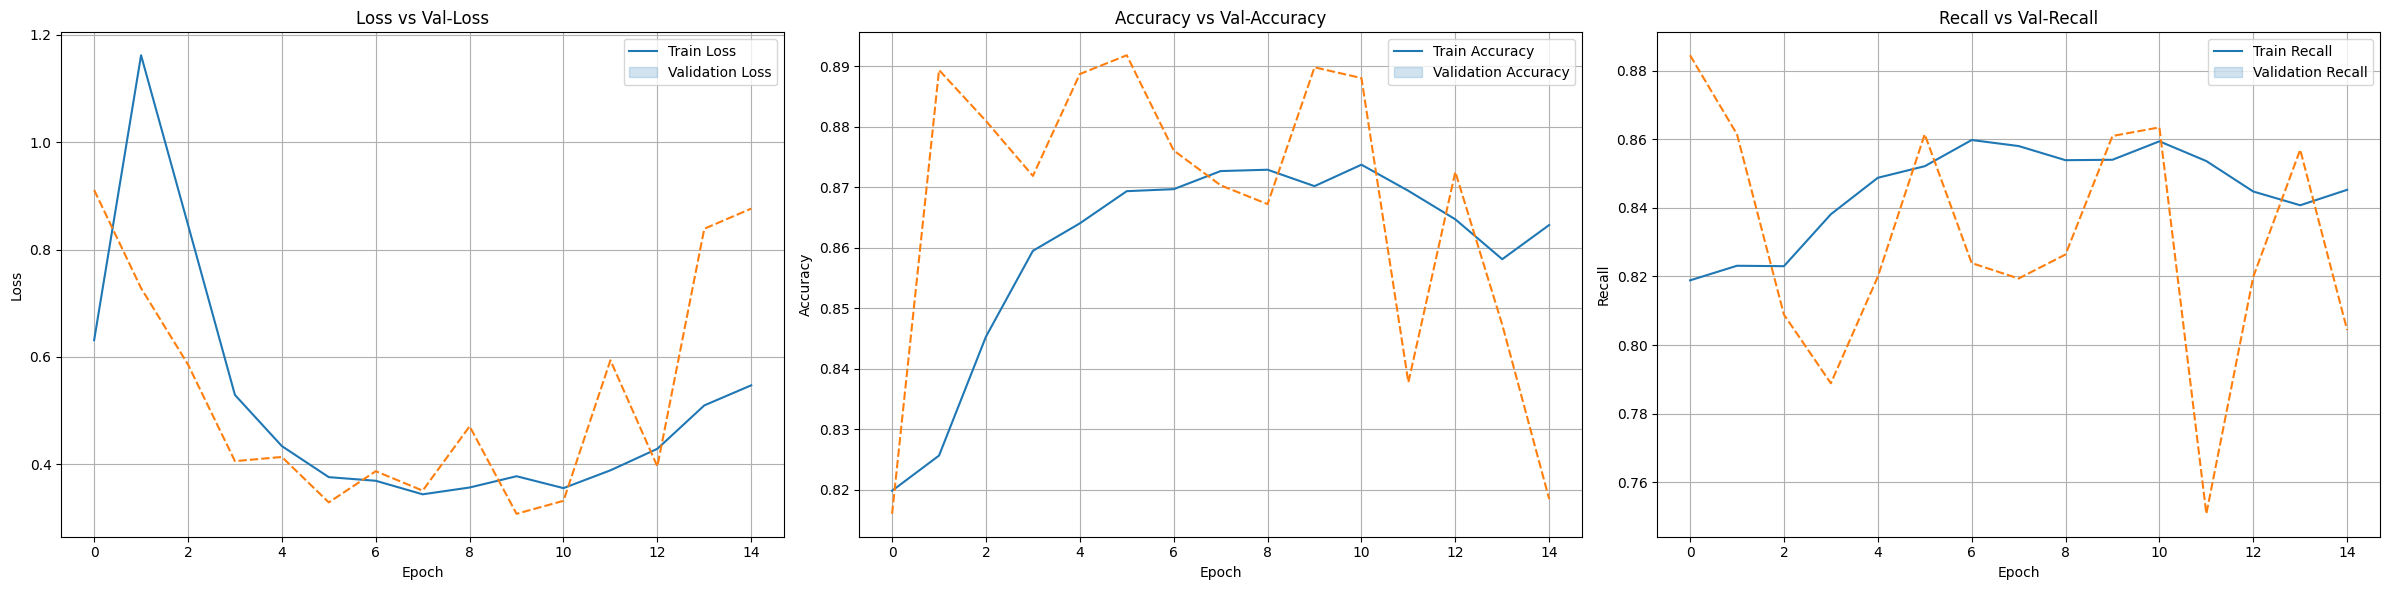

In [75]:
# Plot evaluasi dari training base model
history_improve = pd.DataFrame(history_imp.history)

plt.figure(figsize=(24, 6))

# Plot Loss vs Val-Loss
plt.subplot(1, 3, 1)
sns.lineplot(data=history_improve[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])

# Plot Accuracy vs Val-Accuracy
plt.subplot(1, 3, 2)
sns.lineplot(data=history_improve[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

# Plot Recall vs Val-Recall
plt.subplot(1, 3, 3)
sns.lineplot(data=history_improve[['recall', 'val_recall']])
plt.grid()
plt.title('Recall vs Val-Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Train Recall', 'Validation Recall'])

plt.tight_layout()
plt.show()

1. Train Loss vs Validation Loss:

  - Training Loss cenderung menurun secara konsisten hingga sekitar epoch ke-9, menandakan model belajar dengan baik.

  - Validation Loss sempat turun drastis namun kemudian naik tajam setelah epoch ke-10.

  - Indikasi menghasilkan kurva yang overfitting setelah pertengahan pelatihan, dan menandakan model terlalu belajar pada data training dan kehilangan generalisasi terhadap data validasi.

  - Model improved memiliki training loss lebih baik dan stabil, tetapi validation loss menunjukkan overfitting. Namun tetap lebih baik dibanding model sebelumnya yang validation loss-nya sangat fluktuatif.

2. Train Accuracy vs Validation Accuracy:

  - Training accuracy menunjukkan peningkatan stabil hingga mencapai kurang lebih 87 persen pada epoch ke-10.

  - Validation accuracy cenderung tinggi namun tidak stabil, turun drastis di epoch ke-11 dan 14.

  - Model cenderung overfitting setelah pertengahan epoch, tapi performa training cukup solid, mulai adanya generalisasi pelatihan dibanding model sebelumnya

  - Model improved memperlihatkan akurasi yang lebih stabil dan tinggi di training, walau validasi tidak konsisten. Namun tetap lebih baik dari model sebelumnya yang validasi akurasinya sangat berfluktuasi, lebih overfitting, dan tidak lebih baik generalisasinya.

3. Train Recall vs Validation Recall:

 - Training recall mencapai sekitar 86% dan cukup stabil di seluruh epoch.

 - Validation recall juga fluktuatif, dengan beberapa penurunan tajam (adanya drop besar di epoch ke-11).

 - Namun terdapat beberapa puncak tinggi (epoch ke-10), menandakan potensi untuk mengenali kelas minoritas (adanya irisan validasi dan train).

 - Model improvisasi secara umum memiliki performa recall yang lebih rendah dibanding model sebelumnya, tetapi kurva yang lebih baik dalam mengikuti validasi menandakan bahwa model improvisasi lebih baik untuk menggeneralisasi.

In [76]:
# Evaluasi kedua model VGG16 validation test
results_imp = model_imp.evaluate(val_set)

# Menampilkan hasil evaluasi
print("Loss:", results_imp[0])
print("Accuracy:", results_imp[1])
print("Recall:", results_imp[2])

141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - accuracy: 0.8795 - loss: 0.3481 - recall: 0.8416
Loss: 0.3075607419013977
Accuracy: 0.8898493051528931
Recall: 0.8609304428100586


| Metrics | Improved Model | Base Model |
| --- | --- | --- |
| Loss | 30.75% | 36.6% |
| Accuracy | 88.9% | 85.6% |
| Recall | 86.1% | 90.8% |

Kesimpulan hasil evaluasi model berdasarkan batch pelatihan:

- Terjadi penurunan loss, artinya model yang sudah diimprovisasi mampu mengurangi kesalahan prediksi secara keseluruhan. Ini menunjukkan peningkatan efektivitas pembelajaran, di mana model menjadi lebih mampu menyesuaikan bobotnya terhadap pola data input.

- Akurasi meningkat hampir 3.3%, yang berarti model sekarang lebih baik dalam mengklasifikasikan kedua kelas secara umum. Hal ini menunjukkan bahwa mayoritas prediksi model sekarang benar, dan ada peningkatan performa secara keseluruhan.

- Recall menurun sekitar 4.7% artinya, kemampuan model dalam mendeteksi kelas minoritas (misal: Recyclable atau Organik tergantung urutan) sedikit berkurang.

- Hal ini bisa berarti bahwa model sekarang lebih hati-hati dalam memutuskan kelas positif, sehingga menghasilkan lebih sedikit false positives, namun juga lebih banyak false negatives.

In [ ]:
# Get the probability
y_pred_prob_test_imp= model_imp.predict(test_set) # probabilitas tingkat kepercayaan prediksi

# Get this for standarization of the array
y_pred_class_test_imp = (y_pred_prob_test_imp > 0.5).astype(int).flatten() # menggunakan code ini karena hasil output adalah binary (sigmoid) untuk menghasilkan array [0, 1]
y_true_test = test_set.classes

# Display Classification Report
print('\n Test Set:', classification_report(y_true_test, y_pred_class_test_imp, target_names=(list(test_set.class_indices.keys()))))

79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 290ms/step

 Test Set:               precision    recall  f1-score   support

           O       0.86      0.95      0.90      1401
           R       0.93      0.81      0.86      1112

    accuracy                           0.89      2513
   macro avg       0.89      0.88      0.88      2513
weighted avg       0.89      0.89      0.89      2513



Disclaimer: Pada classification report akan dilakukan analisis hanya melalui dataset test. Alasan utamanya adalah karena pada data split pada saat pre-processing untuk train_set digunakan `shuffle = True` yang dimana ketika melakukan penghitungan classification report akan digunakan train_set.classes yang dimana nilai yang berurutan akan dihitung dengan nilai yang dirandomize oleh urutan gambarnya berdasarkan batchnya, dimana ketika urutannya berbeda akan terjadi miscalculation karena labelling yang berbeda urutannya. Berbeda dengan dataset test dimana `shuffle = False` yang dimana urutannya selaras dengan nilai test_set.classesnya sehingga hasilnya akan sesuai.

Hasil classification report:

1. Nilai Accuracy sebesar `89%`:

  - Model berhasil mengklasifikasikan 89% dari total 2.513 data uji secara benar.

  - Ini mencerminkan performa prediksi keseluruhan yang baik pada kedua kelas: Organik (O) dan Recyclable (R).

  - Akurasi yang tinggi menunjukkan model sudah stabil dan mampu generalisasi dengan baik terhadap data baru.

2. Kelas Organik (O):

  - Precision sebesar 86 persen yang berarti dari semua yang diprediksi sebagai kelas organik, 86% benar-benar Organik.

  - Recall sebesar 95 persen yang berarti dari semua data kelas organik yang sebenarnya, 95% berhasil dideteksi dengan benar.

  - F1-Score sebesar 90 persen yang menandakan nilai gabungan dari precision dan recall yang tinggi menunjukkan keseimbangan deteksi dan ketepatan sangat baik.

  - Model sangat baik dalam mengenali kelas sampah organik (recall tinggi), meskipun masih ada beberapa false positives yang mempengaruhi precision (sedikit kesalahan mengklasifikasikan kelas sampah R sebagai sampah O).

3. Kelas Recycleable (R):

  - Precision sebesar 93 persen yaitu dari semua data yang diprediksi sebagai sampah kelas R, 93% benar-benar Recyclable.

  - Recall sebesar 81 persen yaitu dari semua data sampah kelas R yang sebenarnya, 81% berhasil dideteksi dengan benar.

  - F1-Score sebesar 86 persen yang berarti hasil prediksi masih tergolong sangat baik, tetapi ada gap antara precision dan recall yang relatif cukup besar.

  - Model sangat akurat saat memprediksi data Recyclable (precision tinggi), namun masih ada sejumlah kasus Recyclable yang tidak terdeteksi (recall lebih rendah), menunjukkan adanya false negatives yang perlu dikurangi.

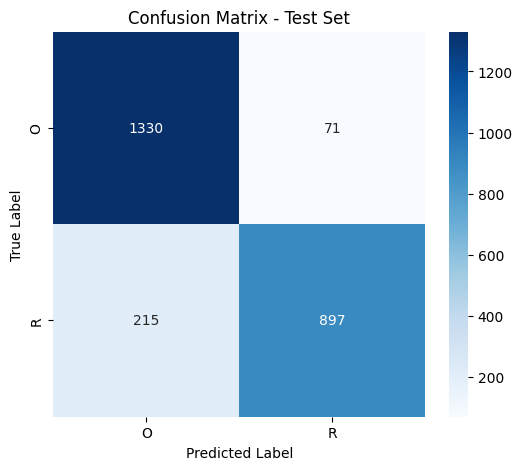

In [82]:
# Confusion Matrix
cm_imp = confusion_matrix(y_true_test, y_pred_class_test_imp)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_imp, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

Intepretasi kunci dari confusion matrix hasil improved model:

1. Model Improved unggul dalam mendeteksi kelas sampah organik, dengan precision dan recall yang meningkat signifikan.

2. Namun, performa dalam mendeteksi kelas sampah recyclable menurun, ditunjukkan dari peningkatan false negative (FN).

3. Secara total, model improved lebih seimbang karena false prediction untuk kelas sampah organik jauh berkurang, dan ini berdampak pada akurasi akhir (89% vs 87% [baseline model]).

Selanjutnya, akan dilakukan komparasi berdasarkan hasil confussion matrix dan classification report dibawah bagian ini untuk lebih menjabarkan keunggulan dan kekurangan model improvement secara holistik.

## 4. Komparasi setelah Improvement Model

### a. Komparasi: Classification Report dan Confusion Matrix


 Test Set Base Model:               precision    recall  f1-score   support

           O       0.89      0.88      0.88      1401
           R       0.85      0.86      0.86      1112

    accuracy                           0.87      2513
   macro avg       0.87      0.87      0.87      2513
weighted avg       0.87      0.87      0.87      2513


 Test Set Improvement:               precision    recall  f1-score   support

           O       0.86      0.95      0.90      1401
           R       0.93      0.81      0.86      1112

    accuracy                           0.89      2513
   macro avg       0.89      0.88      0.88      2513
weighted avg       0.89      0.89      0.89      2513



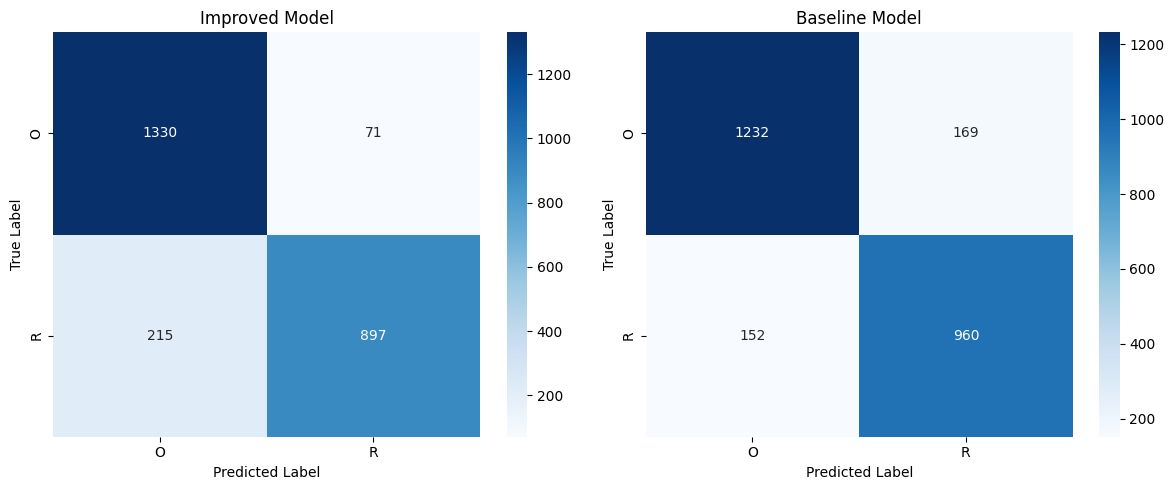

In [88]:
# Display Classification Report Komparasi
print('\n Test Set Base Model:', classification_report(y_true_test, y_pred_class_test, target_names=(list(test_set.class_indices.keys()))))
print('\n Test Set Improvement:', classification_report(y_true_test, y_pred_class_test_imp, target_names=(list(test_set.class_indices.keys()))))

# Plot figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix Improved Model
sns.heatmap(cm_imp, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys(), ax=axes[0])
axes[0].set_title('Improved Model')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Confusion Matrix Base Model
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys(), ax=axes[1])
axes[1].set_title('Baseline Model')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

Berikut rangkuman intepretasi komparasi menggunakan tabel:

1. Tabel Confusion Matrix

| Model |	True Organic (O) → O |	True Organic (O) → R |	True Recyclable (R) → O |	True Recyclable (R) → R |
| --- | --- | --- | --- | --- |
| Improved |	1330 |	71 |	215 |	897 |
| Baseline |	1232 |	169 |	152 |	960 |


2. Tabel Metrics Classification Report

| Metrics | Improved Model | Baseline Model | Catatan |
| --- | --- | --- | --- | 
| Accuracy | Lebih tinggi | Lebih rendah | Improved model memberikan hasil lebih akurat keseluruhan |
| Recall kelas O | Lebih tinggi | Lebih rendah | Menangkap lebih banyak sampah organik dengan benar |
| Recall kelas R | Lebih rendah | Lebih baik | Improved model agak kurang sensitif terhadap recyclable |
| Precision kelas O | Lebih rendah | Lebih baik | Improved model terkadang memprediksi sampah recyclable sebagai sampah organik |
| Precision kelas R | Lebih tinggi | Lebih rendah | Improved model lebih yakin saat memprediksi sampah recyclable |

Kesimpulan penggunaan model hasil improvement:

Model improved menggunakan arsitektur VGG16 lebih unggul untuk menggeneralisasi untuk prediksi tingkat probabilitas confidencenya, walaupun tingkat recall kelas R menurun pada improved model tetapi trade off tersebut memberikan improvement kepada kestabilan tingkat precision kelas O (86 persen) dan precision kelas R (93 persen) yang lebih baik dari baseline model, yang dimana berguna ketika gambar ambigu antara sampah organik atau sampah recycleable (misal terdapat makanan dalam toples) model improved dapat memprediksi salah satu dari kelasnya dengan tingkat keyakinan yang tergolong rendah mungkin hampir 50:50 persentasenya. Selain itu, accuracy pada improved model lebih baik daripada accuracy model baseline. Oleh karena itu, model improved dapat memberikan insight lebih baik dalam klasifikasi sampah ini, karena dapat memberikan keputusan lebih luas kepada user dan memberikan intepretasi tools model yang lebih realistis untuk menghadapi keadaan dunia nyata.

# G. Model Saving
___

In [ ]:
# Saving the best model
model_imp.save('best_model.keras')

## I. Kesimpulan
___

Dari analisis dan pembuatan model pada project ini dapat diambil kesimpulan berdasarkan proses pengerjaan sebagai berikut:

1. Dataset klasifikasi sampah ini terbagi dua kelas utama yaitu sampah kelas organik, dan sampah kelas positif yang dimana output prediksi akan menghasilkan nilai yang biner.

2. Hasil dari Eksplorasi Analisis Data menunjukkan bahwa secara keseluruhan dataset ini memiliki potensi sangat baik untuk pelatihan model klasifikasi berbasis CNN. Hasil dari EDA pun menghasilkan ciri visual karakteristik yang khas antara kelas sampah yang berbeda, distribusi ukuran yang seragam, serta pola warna, dan tekstur yang berbeda memberikan fitur yang visual yang kuat untuk dipelajari model. Terdapat beberapa tantangan seperti adanya data imbalance yang relatif masih seimbang porsinya, dan perbedaan intesitas warna yang dapat ditangani dengan strategi augmentasi yang tepat. Hasil dari eksplorasi data akan menjadi fondasi dan alasan utama untuk feature engineering, preprocessing, dan data augmentasi tuning model klasifikasi yang akan dilakukan pelatihan dan prediksi klasifikasi gambar sampah.

3. Kesimpulan model yang digunakan dalam model ini adalah model yang telah diimprovisasi dengan menggunakan arsitektur VGG16 yang menunjukkan performa yang lebih unggul dalam hal generalisasi prediksi dan persentase probabilitas keyakinan. Meskipun terjadi penurunan pada tingkat recall untuk kelas sampah daur ulang atau Recycleable (R), *trade-off* tersebut menghasilkan peningkatan yang signifikan dalam kestabilan precision untuk kedua kelas dibandingkan model baseline. Hal ini bermanfaat terutama dalam menagani gambar-gambar ambigu secara visual sehingga model dapat memberikan insight tambahan terhadap *ground truth* dari user atau pengguna. Lebih jauh lagi, akurasi keseluruhan dari model improved juga melampaui baseline model, menandakan bahwa model ini tidak hanya lebih presisi, namun juga lebih konsisten dalam menghadapi berbagai variasi gambar. Oleh karena itu, model improved menawarkan kemampuan klasifikasi yang lebih adaptif dan memberikan interpretasi prediktif yang lebih realistis, sehingga dapat menjadi alat bantu keputusan yang lebih efektif bagi pengguna dalam konteks dunia nyata.

4. Hasil prediksi dari model yang akan dilakukan deployment ini juga telah diuji coba dengan menggunakan 2 sample gambar dari dataset test, dan 2 gambar dari resource yang diambil dari google image secara acak. Hasil inferensi menunjukkan bahwa model dapat memprediksi dengan tingkat keyakinan yang besar dan memprediksi *ground truth* secara benar. Model hasil augmentasi dan menggunakan arsitektur VGG16 ini mendapatkan hasil yang relatif baik untuk beberapa sample yang telah di ujicoba.

# J. Rekomendasi
___

Sebagai tambahan untuk project klasifikasi sampah selanjutnya akan dijabarkan beberapa rekomendasi yang mungkin dapat membantu untuk penelitian, studi, ataupun project selanjutnya.

**Rekomendasi 1: Beri Optimasi Augmentasi Warna untuk Meningkatkan Robustness Model terhadap Variasi Visual Sampah Daur Ulang**:

Walaupun model telah menunjukkan performa yang cukup baik dalam mengklasifikasikan gambar ke dalam kelas organik maupun daur ulang, masih terdapat kelemahan signifikan dalam mengidentifikasi gambar daur ulang yang memiliki warna dominan cerah, khususnya gambar bertema buah-buahan, sayuran, atau objek dengan warna hijau/merah yang menyerupai karakteristik visual sampah organik. Kesalahan klasifikasi ini menunjukkan bahwa model masih rentan terhadap *confounding visual features* yang seharusnya tidak menjadi indikator utama dalam menentukan kelas daur ulang. Untuk mengatasi hal ini, disarankan agar pada studi selanjutnya dilakukan augmentasi warna (color augmentation) secara lebih komprehensif dalam preprocessing dataset pelatihan. Teknik augmentasi seperti:

 - *Hue Shift* atau pergeseran rona warna.

 - *Saturation jittering* peningkatan dan penurunan kejenuhan secara acak.

 - *Color channel shuffling* atau pertukaran kanal warna RGB.

Modifikasi augmentasi ini dapat membantu untuk lebih tahan terhadap variasi warna dan tidak terlalu overfit terhadap pola warna tertentu yang bersifat sifatnya kebetulan dalam dataset pelatihan. Terdapat journal studi empiris dalam literatur dimana dijelaskan oleh [Shorten & Khoshgoftaar (2019)](https://drive.google.com/file/d/1yNv4_SN-os4e9_xNrC9irW5naPi4Iuqd/view?usp=sharing) bahwa augmentasi berbasis warna mampu meningkatkan generalisasi CNN, terutama dalam klasifikasi citra dengan kelas yang memiliki kemiripan tekstur dan bentuk, namun berbeda dalam konteks semantik. Dengan implementasi augmentasi warna yang lebih agresif dan adaptif, model tidak hanya akan belajar dari bentuk dan tekstur, tetapi juga mampu mengabaikan atribut warna yang bersifat menyesatkan, sehingga menghasilkan performa klasifikasi yang lebih akurat dan realistis, terutama pada kondisi gambar di dunia nyata.

**Rekomendasi 2: Penambahan Dense Layer dan Eksplorasi Arsitektur Tambahan pada Transfer Learning untuk Peningkatan Akurasi dan Konvergensi:**

Dalam penerapan transfer learning menggunakan VGG16, salah satu pendekatan penting untuk meningkatkan performa klasifikasi adalah dengan menambahkan Dense layer tambahan dalam bagian atau phase fully connected layers tambahan pada model yang menggunakan arsitektur VGG16. Karena dalam project ini, dense layer hanya diaplikasikan dua layer saja yang dimana menghasilkan hasil yang masih overfitting (akurasi validasi yang berfluktuasi), walaupun kovergensi membaik dibanding base model. Selain itu, penambahan Dense layer berfungsi untuk:

 - Menangkap pola non-linear dari fitur yang telah diekstraksi.

 - Meningkatkan kapasitas representasi model pada tahap klasifikasi akhir.

 - Meningkatkan konvergensi model selama pelatihan.

 - Memberikan model kemampuan adaptasi terhadap karakteristik unik dari dataset klasifikasi sampah.

Selain itu, eksplorasi arsitektur tambahan seperti **EfficientNetB0-B3**, **ResNet50**, atau **MobileNetV2** sangat disarankan untuk menjadi model pembanding. Seperti yang telah dilakukan oleh studi dari [Tan, M., & Le, Q. V. (2019)](https://arxiv.org/pdf/1905.11946) bahwa arsitektur ini dapat memberikan hasil yang efficient untuk dataset yang kompleks, dan unggul berdasarkan hasil jurnal tersebut. Studi tersebut memperkenalkan EfficientNet sebagai arsitektur yang akurat bahkan untuk dataset yang sangat memiliki keterbatasan sumber daya komputasi. Dengan mengkombinasikan penambahan Dense layers, dan Arsitektur selain VGG16 sebagai model pembanding untuk studi klasifikasi sampah selanjutnya sehingga hasil untuk studi selanjutnya dapat menghasilkan model yang lebih akurat, stabil, dan memiliki generalisasi yang baik, seiring meningkatkan penemuan baru untuk studi-studi computer vision kedepannya untuk klasifikasi gambar dataset lainnya.